# Plot Butler's importance in his Miami Heat years

## Imports 

In [11]:
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import matplotlib.image as mpimg

from PIL import Image

import datetime
from highlight_text import fig_text

## Retrieve data for Chicago


In [12]:
df1 = pd.read_csv("../data/teams_total/miami_2019-2020.csv")
df2 = pd.read_csv("../data/teams_total/miami_2020-2021.csv")
df3 = pd.read_csv("../data/teams_total/miami_2021-2022.csv")


In [13]:
df = pd.concat([df1,df2,df3])

In [14]:
df.head()

,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Bam Adebayo,22,72,72,2417,440,790,0.557,2,...,0.691,176,559,735,368,82,93,204,182,1146
1,2,Duncan Robinson,25,73,68,2166,323,687,0.470,270,...,0.931,10,222,232,102,35,19,70,193,983
2,3,Kendrick Nunn,24,67,67,1962,401,914,0.439,137,...,0.850,21,159,180,220,56,15,114,152,1024
3,4,Jimmy Butler,30,58,58,1959,345,758,0.455,29,...,0.834,106,280,386,350,103,32,127,81,1157
4,5,Goran Dragić,33,59,3,1663,319,724,0.441,124,...,0.776,29,158,187,301,40,10,144,124,953


In [15]:
#df.loc[df['Player'].str.split().str.len() == 2, 'Player'] = df['Player'].str.split().str[-1]
df['Player']= df['Player'].str.split().str[-1]


In [16]:
df = df[['Player','FG', 'MP', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'PTS']]

In [17]:
df = df.groupby(['Player']).sum().reset_index()

## Plot different stats and Jimmy's rank in the team

In [18]:
points = df.sort_values(by=['PTS'], ascending=False).head(5)
assists = df.sort_values(by=['AST'], ascending=False).head(5)
rebounds = df.sort_values(by=['TRB'], ascending=False).head(5)
minutes = df.sort_values(by=['MP'], ascending=False).head(5)
freethrows = df.sort_values(by=['FT'], ascending=False).head(5)

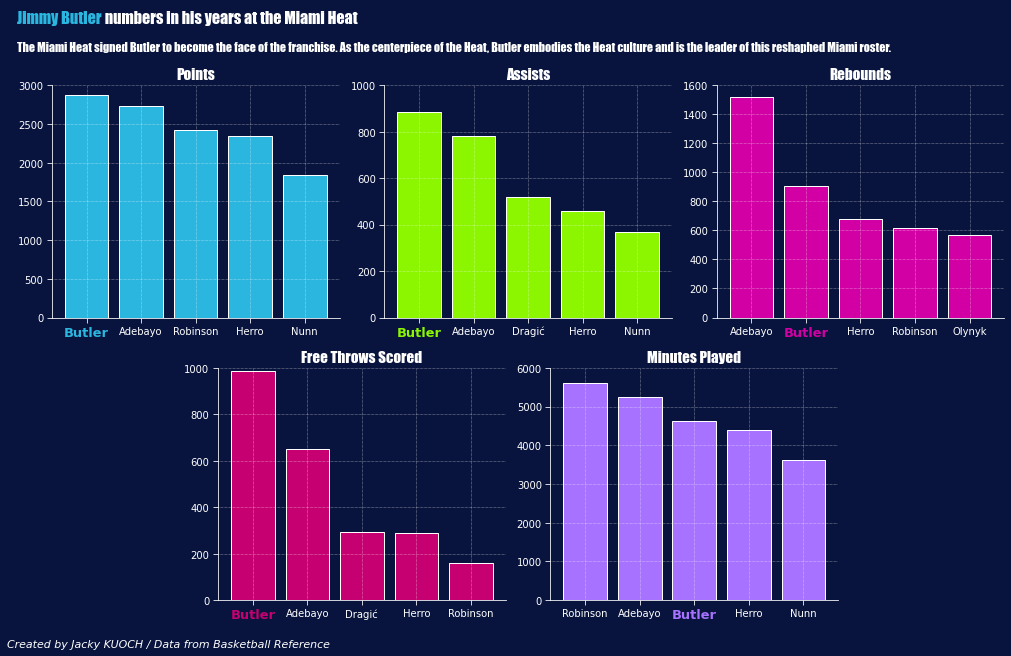

In [23]:
# Create subplots
fig,axs = plt.subplots(2,3,figsize = (14,8))
hfont = {'fontname':'Impact'}

#Position of the plots
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

#Add grid to the plots
ax1.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax2.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax3.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax4.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax5.grid(ls="dotted", lw="0.5", color="w", zorder=1)

#Change the background color
fig.set_facecolor("#08143D")
ax1.patch.set_facecolor("#08143D")
ax2.patch.set_facecolor("#08143D")
ax3.patch.set_facecolor("#08143D")
ax4.patch.set_facecolor("#08143D")
ax5.patch.set_facecolor("#08143D")

#Change the ticks color
ax1.tick_params(colors="w", length=5)
ax2.tick_params(colors="w", length=5)
ax3.tick_params(colors="w", length=5)
ax4.tick_params(colors="w", length=5)
ax5.tick_params(colors="w", length=5)

#Change the axes color
## First plot
ax1.spines['bottom'].set_color("w")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color("w")

## Second plot
ax2.spines['bottom'].set_color("w")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color("w")

## Third plot
ax3.spines['bottom'].set_color("w")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_color("w")

## Fourth plot
ax4.spines['bottom'].set_color("w")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_color("w")

## Fith plot
ax5.spines['bottom'].set_color("w")
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_color("w")

## Set ylimits
ax1.set_ylim(0,3000)
ax2.set_ylim(0,1000)
ax3.set_ylim(0,1600)
ax4.set_ylim(0,1000)
ax5.set_ylim(0,6000)

# Title and credits
fig_text(0.01,1.08, s="<Jimmy Butler> numbers in his years at the Miami Heat\n", highlight_textprops=[{"color": '#2bb6e0'}], fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.01,1.01, "The Miami Heat signed Butler to become the face of the franchise. As the centerpiece of the Heat, Butler embodies the Heat culture and is the leader of this reshaphed Miami roster.", fontsize = 12, fontweight="light", color = "w", **hfont)
fig.text(0, -0.025, "Created by Jacky KUOCH / Data from Basketball Reference",fontstyle="italic",fontsize=11, color="w")

# Plot bar charts of stats
ax1.bar(points['Player'], points['PTS'], zorder=0, color="#2bb6e0",edgecolor = 'w')
ax2.bar(assists['Player'], assists['AST'], zorder=0, color="#8BF600",edgecolor = 'w')
ax3.bar(rebounds['Player'], rebounds['TRB'], zorder=0, color="#D200A4",edgecolor = 'w')
ax4.bar(freethrows['Player'], freethrows['FT'],zorder=0, color="#C60070",edgecolor = 'w')
ax5.bar(minutes['Player'], minutes['MP'],zorder=0, color="#A672FF",edgecolor = 'w')

# Axes Label
ax1.set_title("Points", color="w", fontsize=15 , **hfont)
ax2.set_title("Assists", color="w", fontsize=15 , **hfont)
ax3.set_title("Rebounds", color="w", fontsize=15 , **hfont)
ax4.set_title("Free Throws Scored", color="w", fontsize=15 , **hfont)
ax5.set_title("Minutes Played", color="w", fontsize=15 , **hfont)

#Highlight Jimmy's xticks for first plot
ax1.get_xticklabels()[0].set_color("#2bb6e0")
ax1.get_xticklabels()[0].set_fontsize(13)
ax1.get_xticklabels()[0].set_weight("heavy")

#Highlight Jimmy's xticks for second plot
ax2.get_xticklabels()[0].set_color("#8BF600")
ax2.get_xticklabels()[0].set_fontsize(13)
ax2.get_xticklabels()[0].set_weight("heavy")

#Highlight Jimmy's xticks for third plot
ax3.get_xticklabels()[1].set_color("#D200A4")
ax3.get_xticklabels()[1].set_fontsize(13)
ax3.get_xticklabels()[1].set_weight("heavy")

#Highlight Jimmy's xticks for fourth plot
ax4.get_xticklabels()[0].set_color("#C60070")
ax4.get_xticklabels()[0].set_fontsize(13)
ax4.get_xticklabels()[0].set_weight("heavy")

#Highlight Jimmy's xticks for fith plot
ax5.get_xticklabels()[2].set_color("#A672FF")
ax5.get_xticklabels()[2].set_fontsize(13)
ax5.get_xticklabels()[2].set_weight("heavy")


fig.tight_layout()
